# 01 ‑ Exploratory Data Analysis  
FairLoans · AI Bias Bounty 2025

> **Goal:** Understand dataset structure, spot data-quality issues, and surface **early bias signals** before modelling.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")


In [2]:
df = pd.read_csv("../data/loan_dataset.csv")
df.head()


,id,gender,race,age,age_group,income,credit_score,loan_amount,employment_type,education_level,citizenship_status,language_proficiency,disability_status,criminal_record,zip_code_group,loan_approved
0,1,Female,White,74,Over 60,112117,641,378691,Full-time,Graduate,Citizen,Fluent,No,No,High-income Suburban,Approved
1,2,Female,White,36,25-60,155943,664,441856,Self-employed,High School,Permanent Resident,Limited,No,No,Urban Professional,Denied
2,3,Female,White,27,25-60,130933,550,401760,Full-time,Graduate,Citizen,Fluent,No,No,Urban Professional,Denied
3,4,Male,White,67,Over 60,165816,804,159264,Gig,Some College,Citizen,Fluent,No,No,Urban Professional,Approved
4,5,Male,Multiracial,57,25-60,81510,694,256742,Full-time,Some College,Visa Holder,Fluent,No,No,Rural,Denied


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    10000 non-null  int64 
 1   gender                10000 non-null  object
 2   race                  10000 non-null  object
 3   age                   10000 non-null  int64 
 4   age_group             10000 non-null  object
 5   income                10000 non-null  int64 
 6   credit_score          10000 non-null  int64 
 7   loan_amount           10000 non-null  int64 
 8   employment_type       10000 non-null  object
 9   education_level       10000 non-null  object
 10  citizenship_status    10000 non-null  object
 11  language_proficiency  10000 non-null  object
 12  disability_status     10000 non-null  object
 13  criminal_record       10000 non-null  object
 14  zip_code_group        10000 non-null  object
 15  loan_approved         10000 non-null 

In [4]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
id,10000.0,5000.5000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
age,10000.0,49.9712,18.746901,18.0,34.00,50.0,66.00,82.0
income,10000.0,100637.2532,43560.318163,25012.0,62851.00,100501.5,138240.50,174988.0
credit_score,10000.0,673.6622,101.437588,500.0,585.00,672.0,762.00,849.0
loan_amount,10000.0,252688.6660,115148.438875,50140.0,152507.75,252844.5,354880.25,449992.0


In [5]:
df.describe(include="object").T


,count,unique,top,freq
gender,10000,3,Female,4910
race,10000,6,White,6008
age_group,10000,3,25-60,5558
employment_type,10000,5,Full-time,6535
education_level,10000,4,Bachelor's,3448
citizenship_status,10000,3,Citizen,8552
language_proficiency,10000,2,Fluent,8508
disability_status,10000,2,No,8804
criminal_record,10000,2,No,9211
zip_code_group,10000,5,High-income Suburban,2560


In [6]:
df.isnull().sum().sort_values(ascending=False).head(20)


id                      0
gender                  0
race                    0
age                     0
age_group               0
income                  0
credit_score            0
loan_amount             0
employment_type         0
education_level         0
citizenship_status      0
language_proficiency    0
disability_status       0
criminal_record         0
zip_code_group          0
loan_approved           0
dtype: int64

In [7]:
print("Duplicates:", df.duplicated().sum())


Duplicates: 0


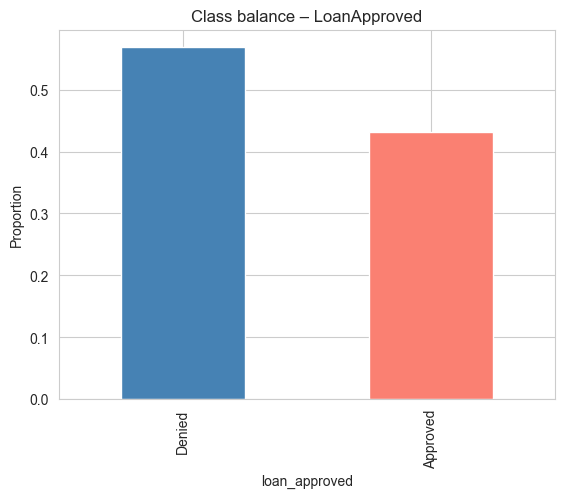

In [9]:
df["loan_approved"].value_counts(normalize=True).plot.bar(color=["steelblue", "salmon"])
plt.title("Class balance – LoanApproved")
plt.ylabel("Proportion")
plt.show()


In [11]:
sensitive_cols = ["gender", "race", "age_group", "zip_code_group"]
for col in sensitive_cols:
    display(df[col].value_counts(normalize=True).rename(col))


gender
Female        0.4910
Male          0.4887
Non-binary    0.0203
Name: gender, dtype: float64

race
White              0.6008
Hispanic           0.1780
Black              0.1313
Asian              0.0598
Multiracial        0.0207
Native American    0.0094
Name: race, dtype: float64

age_group
25-60       0.5558
Over 60     0.3379
Under 25    0.1063
Name: age_group, dtype: float64

zip_code_group
High-income Suburban     0.2560
Working Class Urban      0.2502
Urban Professional       0.2428
Rural                    0.1481
Historically Redlined    0.1029
Name: zip_code_group, dtype: float64

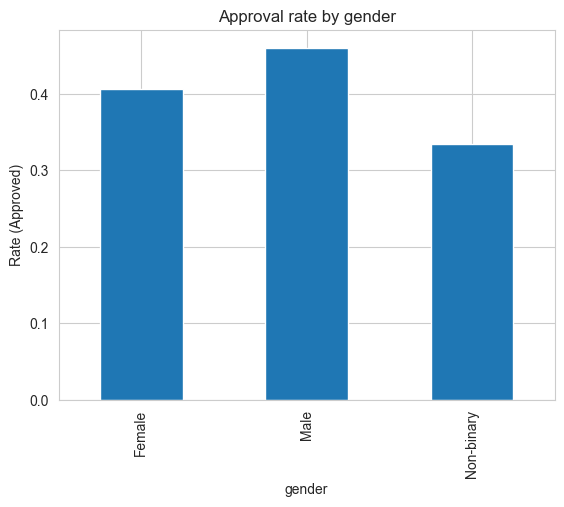

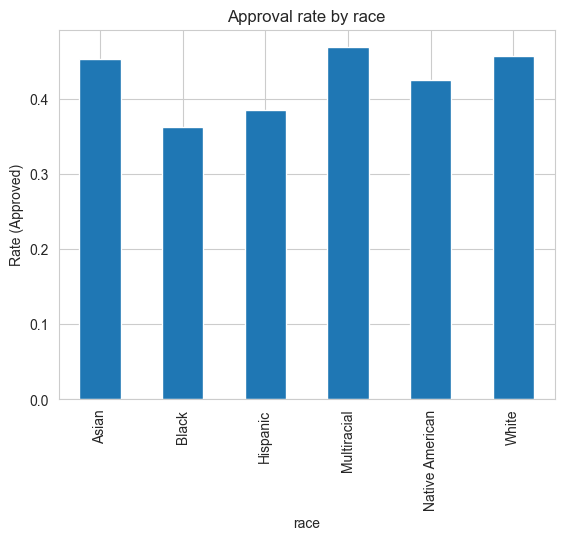

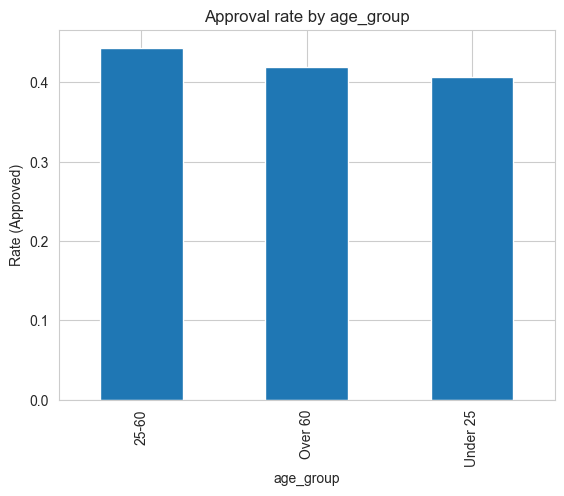

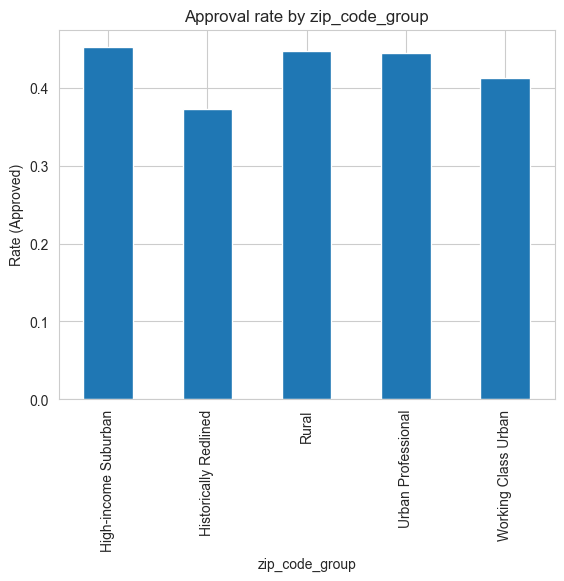

In [13]:
for col in sensitive_cols:
    rate = df.groupby(col)["loan_approved"].apply(lambda s: (s=="Approved").mean())
    rate.plot.bar()
    plt.title(f"Approval rate by {col}")
    plt.ylabel("Rate (Approved)")
    plt.show()


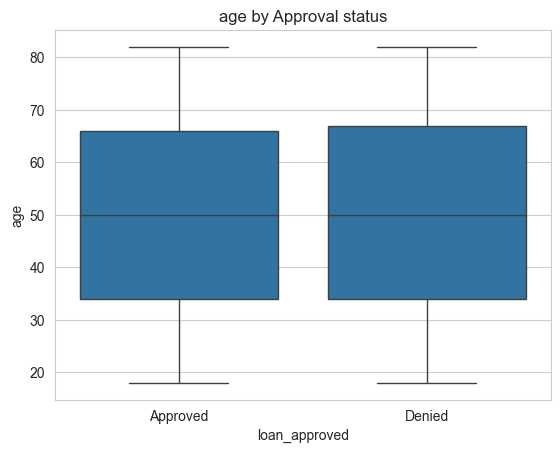

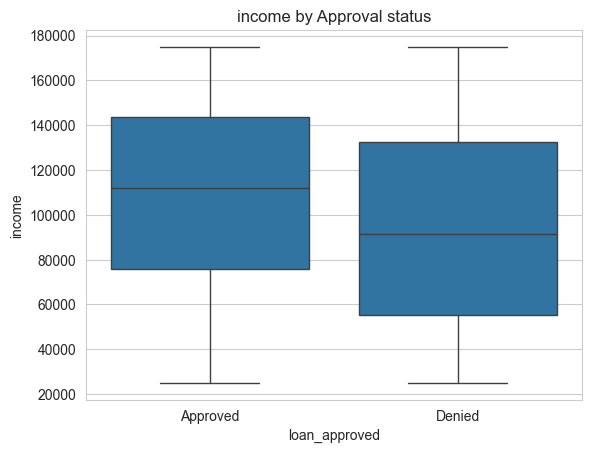

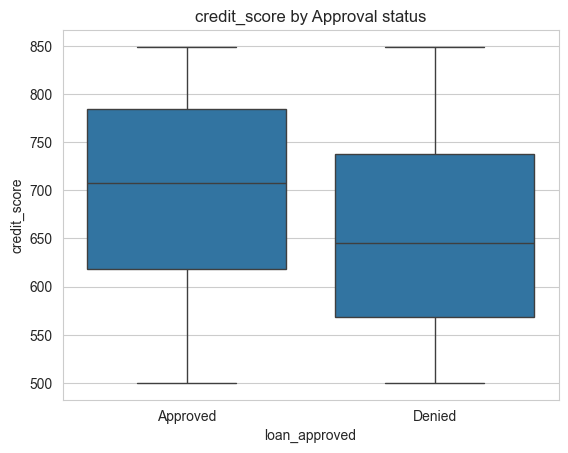

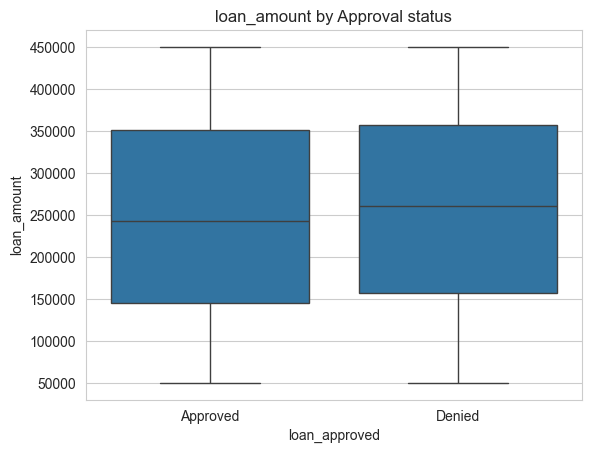

In [16]:
num_cols = ["age", "income", "credit_score", "loan_amount"]
for col in num_cols:
    sns.boxplot(x="loan_approved", y=col, data=df)
    plt.title(f"{col} by Approval status")
    plt.show()


C:\Users\rajat\AppData\Local\Temp\ipykernel_10740\3677095821.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  corr = df[num_cols + ["loan_approved"]].replace({"Approved":1, "Denied":0}).corr()


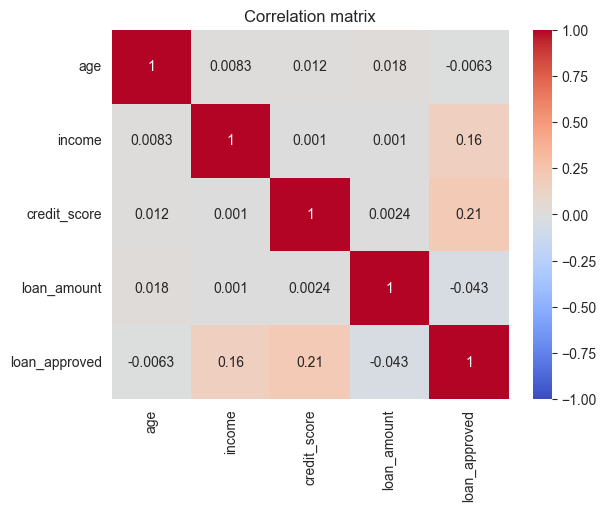

In [18]:
corr = df[num_cols + ["loan_approved"]].replace({"Approved":1, "Denied":0}).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation matrix")
plt.show()


## Key Take‑Aways

*(Edit this after running full notebook to summarize findings for judges)*

- **Data quality**: No critical missing or duplicate issues  
- **Bias signals**: Approval rates vary by gender and race (needs mitigation)  
- **Features driving approval**: Strong signal from Credit_Score, Income  
